In [252]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re

In [323]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [253]:
def flattenJSON(json_obj):   
    data = json.loads(json_obj)
    
    def flatten_dict(data):
        for k in list(data):
            if isinstance(data[k], dict):
                child = flatten_dict(data[k])
                for k_ in child:
                    data[k + '.' + k_] = re.sub('^u?\'(.*?)\'','\g<1>',child[k_])
                else:
                    del data[k]
        return data
    
    return flatten_dict(data)

def toConvertableJson(s):    
    def _convertableJson(matchObj):
        if matchObj.group(1):
            return '"'
        elif matchObj.group(2):
            return ':"False"'
        elif matchObj.group(3):
            return ':"True"'
    
    d = flattenJSON(s)
    for i,v in enumerate(d):
        if isinstance(d[v], str) and ('{' in d[v]):
            d[v] = json.loads(re.sub('(\')|(: False)|(: True)',_convertableJson, d[v]))
    return flattenJSON(json.dumps(d))

# Business

In [254]:
with open('yelp_dataset/business.json') as f:
    data = [toConvertableJson(line) for line in f]
bz = pd.DataFrame(data)
bz.drop(['hours','attributes'], axis=1, inplace=True)

In [255]:
bz.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,attributes.GoodForKids,attributes.RestaurantsReservations,attributes.Caters,attributes.NoiseLevel,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.RestaurantsPriceRange2,attributes.OutdoorSeating,attributes.BikeParking,attributes.HasTV,attributes.WiFi,attributes.Alcohol,attributes.RestaurantsAttire,attributes.RestaurantsGoodForGroups,attributes.RestaurantsDelivery,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,attributes.GoodForMeal.dessert,attributes.GoodForMeal.latenight,attributes.GoodForMeal.lunch,attributes.GoodForMeal.dinner,attributes.GoodForMeal.brunch,attributes.GoodForMeal.breakfast,attributes.BusinessParking.garage,attributes.BusinessParking.street,attributes.BusinessParking.validated,attributes.BusinessParking.lot,attributes.BusinessParking.valet,attributes.Ambience.romantic,attributes.Ambience.intimate,attributes.Ambience.classy,attributes.Ambience.hipster,attributes.Ambience.divey,attributes.Ambience.touristy,attributes.Ambience.trendy,attributes.Ambience.upscale,attributes.Ambience.casual,attributes.BusinessAcceptsCreditCards,attributes.BusinessAcceptsBitcoin,attributes.ByAppointmentOnly,attributes.AcceptsInsurance,attributes.GoodForDancing,attributes.CoatCheck,attributes.HappyHour,attributes.Music.dj,attributes.Music.background_music,attributes.Music.no_music,attributes.Music.jukebox,attributes.Music.live,attributes.Music.video,attributes.Music.karaoke,attributes.BestNights.monday,attributes.BestNights.tuesday,attributes.BestNights.friday,attributes.BestNights.wednesday,attributes.BestNights.thursday,attributes.BestNights.sunday,attributes.BestNights.saturday,attributes.Ambience,attributes.BusinessParking,attributes.WheelchairAccessible,attributes.DogsAllowed,attributes.BYOBCorkage,attributes.DriveThru,attributes.Smoking,attributes.AgesAllowed,attributes.HairSpecializesIn.straightperms,attributes.HairSpecializesIn.coloring,attributes.HairSpecializesIn.extensions,attributes.HairSpecializesIn.africanamerican,attributes.HairSpecializesIn.curly,attributes.HairSpecializesIn.kids,attributes.HairSpecializesIn.perms,attributes.HairSpecializesIn.asian,attributes.Corkage,attributes.BYOB,attributes.GoodForMeal,attributes.Music,attributes.DietaryRestrictions.dairy-free,attributes.DietaryRestrictions.gluten-free,attributes.DietaryRestrictions.vegan,attributes.DietaryRestrictions.kosher,attributes.DietaryRestrictions.halal,attributes.DietaryRestrictions.soy-free,attributes.DietaryRestrictions.vegetarian,attributes.BestNights,attributes.HairSpecializesIn,attributes.Open24Hours,attributes.DietaryRestrictions,attributes.RestaurantsCounterService
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,"Golf, Active Life",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported...",True,True,True,loud,True,True,2,False,False,False,no,full_bar,casual,True,False,9:0-0:0,9:0-0:0,9:0-0:0,9:0-0:0,9:0-1:0,9:0-1:0,9:0-0:0,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant

In [90]:
bz.shape

(9630, 14)

In [13]:
# bz.drop(['address','postal_code','latitude','longitude','hours'],axis=1,inplace=True)

In [295]:
pd.DataFrame({'count':bz.count(),'unique':bz.nunique(),'null count':bz.isnull().sum()})

,count,unique,null count
business_id,192609,192609,0
name,192609,145046,0
address,192609,151977,0
city,192609,1204,0
state,192609,36,0
...,...,...,...
attributes.BestNights,7,1,192602
attributes.HairSpecializesIn,31,1,192578
attributes.Open24Hours,13,2,192596
attributes.DietaryRestrictions,7,1,192602


In [296]:
bz.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,attributes.GoodForKids,attributes.RestaurantsReservations,attributes.Caters,attributes.NoiseLevel,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.RestaurantsPriceRange2,attributes.OutdoorSeating,attributes.BikeParking,attributes.HasTV,attributes.WiFi,attributes.Alcohol,attributes.RestaurantsAttire,attributes.RestaurantsGoodForGroups,attributes.RestaurantsDelivery,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,attributes.GoodForMeal.dessert,attributes.GoodForMeal.latenight,attributes.GoodForMeal.lunch,attributes.GoodForMeal.dinner,attributes.GoodForMeal.brunch,attributes.GoodForMeal.breakfast,attributes.BusinessParking.garage,attributes.BusinessParking.street,attributes.BusinessParking.validated,attributes.BusinessParking.lot,attributes.BusinessParking.valet,attributes.Ambience.romantic,attributes.Ambience.intimate,attributes.Ambience.classy,attributes.Ambience.hipster,attributes.Ambience.divey,attributes.Ambience.touristy,attributes.Ambience.trendy,attributes.Ambience.upscale,attributes.Ambience.casual,attributes.BusinessAcceptsCreditCards,attributes.BusinessAcceptsBitcoin,attributes.ByAppointmentOnly,attributes.AcceptsInsurance,attributes.GoodForDancing,attributes.CoatCheck,attributes.HappyHour,attributes.Music.dj,attributes.Music.background_music,attributes.Music.no_music,attributes.Music.jukebox,attributes.Music.live,attributes.Music.video,attributes.Music.karaoke,attributes.BestNights.monday,attributes.BestNights.tuesday,attributes.BestNights.friday,attributes.BestNights.wednesday,attributes.BestNights.thursday,attributes.BestNights.sunday,attributes.BestNights.saturday,attributes.Ambience,attributes.BusinessParking,attributes.WheelchairAccessible,attributes.DogsAllowed,attributes.BYOBCorkage,attributes.DriveThru,attributes.Smoking,attributes.AgesAllowed,attributes.HairSpecializesIn.straightperms,attributes.HairSpecializesIn.coloring,attributes.HairSpecializesIn.extensions,attributes.HairSpecializesIn.africanamerican,attributes.HairSpecializesIn.curly,attributes.HairSpecializesIn.kids,attributes.HairSpecializesIn.perms,attributes.HairSpecializesIn.asian,attributes.Corkage,attributes.BYOB,attributes.GoodForMeal,attributes.Music,attributes.DietaryRestrictions.dairy-free,attributes.DietaryRestrictions.gluten-free,attributes.DietaryRestrictions.vegan,attributes.DietaryRestrictions.kosher,attributes.DietaryRestrictions.halal,attributes.DietaryRestrictions.soy-free,attributes.DietaryRestrictions.vegetarian,attributes.BestNights,attributes.HairSpecializesIn,attributes.Open24Hours,attributes.DietaryRestrictions,attributes.RestaurantsCounterService
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,"Golf, Active Life",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported...",True,True,True,loud,True,True,2,False,False,False,no,full_bar,casual,True,False,9:0-0:0,9:0-0:0,9:0-0:0,9:0-0:0,9:0-1:0,9:0-1:0,9:0-0:0,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant

In [297]:
bz['attributes.GoodForMeal.dessert'].value_counts()

False    27628
True      2084
Name: attributes.GoodForMeal.dessert, dtype: int64

In [300]:
bz[bz['attributes.GoodForMeal.dessert'].isnull()==False].count()
bz[bz['attributes.GoodForMeal.dessert'].isnull()].count()

business_id                             162897
name                                    162897
address                                 162897
city                                    162897
state                                   162897
                                         ...  
attributes.BestNights                        3
attributes.HairSpecializesIn                31
attributes.Open24Hours                       7
attributes.DietaryRestrictions               0
attributes.RestaurantsCounterService         0
Length: 107, dtype: int64

In [68]:
# def unpack(df, column, fillna=None):
#     ret = None
#     if fillna is None:
#         tmp = pd.DataFrame((d for idx, d in df[column].iteritems()))
#         ret = pd.concat([df.drop(column,axis=1), tmp], axis=1)
#     else:
#         tmp = pd.DataFrame((d for idx, d in 
#         df[column].iteritems())).fillna(fillna)
#         ret = pd.concat([df.drop(column,axis=1), tmp], axis=1)
#     return ret

# x = bz['attributes'][:5].apply(pd.Series)
# x

#### Filter for restaurants/businesses dealing with food

('Restaurants' in x) or (('Bars' in x) and ('Cigar Bars' not in x) and ('Oxygen Bars' not in x)) or ('Food' in x) or ('Coffee & Tea' in x) or ('Fast Food' in x) or ('Burger' in x) or ('Pizza' in x) or ('Sandwiches' in x) or ('Breakfast & Brunch' in x)

In [287]:
rt = bz[bz['categories'].apply(lambda x:('Restaurants' in x) or (('Bars' in x) and ('Cigar Bars' not in x) and ('Oxygen Bars' not in x)) or ('Food' in x) or ('Coffee & Tea' in x) or ('Fast Food' in x) or ('Burger' in x) or ('Pizza' in x) or ('Sandwiches' in x) or ('Breakfast & Brunch' in x) if x is not None else False)]

#### drop core features

In [289]:
for i in rt.columns:
    if 'Hair' in i:
        rt.drop(rt[(rt[i]=='False') | (rt[i]=='True')]['business_id'].index, axis=0, inplace=True)
        rt.drop(columns=i, axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### drop training features

In [290]:
for i in rt.columns:
    if 'hour' in i:
        rt.drop(columns=i, axis=1, inplace=True)

##### eda on rt

In [301]:
rt['attributes.GoodForMeal.dessert'].value_counts()

False    27618
True      2083
Name: attributes.GoodForMeal.dessert, dtype: int64

In [302]:
rt[rt['attributes.GoodForMeal.dessert'].isnull()==False].count()
rt[rt['attributes.GoodForMeal.dessert'].isnull()].count()

business_id                                  47588
name                                         47588
address                                      47588
city                                         47588
state                                        47588
                                             ...  
attributes.DietaryRestrictions.vegetarian       15
attributes.BestNights                            2
attributes.Open24Hours                           3
attributes.DietaryRestrictions                   0
attributes.RestaurantsCounterService             0
Length: 91, dtype: int64

In [330]:
rt.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,attributes.GoodForKids,attributes.RestaurantsReservations,attributes.Caters,attributes.NoiseLevel,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.RestaurantsPriceRange2,attributes.OutdoorSeating,attributes.BikeParking,attributes.HasTV,attributes.WiFi,attributes.Alcohol,attributes.RestaurantsAttire,attributes.RestaurantsGoodForGroups,attributes.RestaurantsDelivery,attributes.GoodForMeal.dessert,attributes.GoodForMeal.latenight,attributes.GoodForMeal.lunch,attributes.GoodForMeal.dinner,attributes.GoodForMeal.brunch,attributes.GoodForMeal.breakfast,attributes.BusinessParking.garage,attributes.BusinessParking.street,attributes.BusinessParking.validated,attributes.BusinessParking.lot,attributes.BusinessParking.valet,attributes.Ambience.romantic,attributes.Ambience.intimate,attributes.Ambience.classy,attributes.Ambience.hipster,attributes.Ambience.divey,attributes.Ambience.touristy,attributes.Ambience.trendy,attributes.Ambience.upscale,attributes.Ambience.casual,attributes.BusinessAcceptsCreditCards,attributes.BusinessAcceptsBitcoin,attributes.ByAppointmentOnly,attributes.AcceptsInsurance,attributes.GoodForDancing,attributes.CoatCheck,attributes.HappyHour,attributes.Music.dj,attributes.Music.background_music,attributes.Music.no_music,attributes.Music.jukebox,attributes.Music.live,attributes.Music.video,attributes.Music.karaoke,attributes.BestNights.monday,attributes.BestNights.tuesday,attributes.BestNights.friday,attributes.BestNights.wednesday,attributes.BestNights.thursday,attributes.BestNights.sunday,attributes.BestNights.saturday,attributes.Ambience,attributes.BusinessParking,attributes.WheelchairAccessible,attributes.DogsAllowed,attributes.BYOBCorkage,attributes.DriveThru,attributes.Smoking,attributes.AgesAllowed,attributes.Corkage,attributes.BYOB,attributes.GoodForMeal,attributes.Music,attributes.DietaryRestrictions.dairy-free,attributes.DietaryRestrictions.gluten-free,attributes.DietaryRestrictions.vegan,attributes.DietaryRestrictions.kosher,attributes.DietaryRestrictions.halal,attributes.DietaryRestrictions.soy-free,attributes.DietaryRestrictions.vegetarian,attributes.BestNights,attributes.Open24Hours,attributes.DietaryRestrictions,attributes.RestaurantsCounterService
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported...",True,True,True,loud,True,True,2,False,False,False,no,full_bar,casual,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"Sushi Bars, Restaurants, Japanese",True,True,False,average,True,True,2,False,True,True,no,beer_and_wine,casual,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"Restaurants, Breakfast & Brunch, Mexican, Taco...",True,False,NaN,NaN,NaN,True,1,False,NaN,False,no,none,casual,True,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,5t3KVdMnFgAYmSl1wYLhmA,The Kilted Buffa

In [317]:
rt[rt['state']=='NY'].count() # there are 13 NYC restaurants in dataset

business_id                                  13
name                                         13
address                                      13
city                                         13
state                                        13
                                             ..
attributes.DietaryRestrictions.vegetarian     0
attributes.BestNights                         0
attributes.Open24Hours                        0
attributes.DietaryRestrictions                0
attributes.RestaurantsCounterService          0
Length: 91, dtype: int64

In [309]:
rt[rt['city']=='Los Angeles'].count() # there are 0 LA restaurants in dataset

business_id                                  0
name                                         0
address                                      0
city                                         0
state                                        0
                                            ..
attributes.DietaryRestrictions.vegetarian    0
attributes.BestNights                        0
attributes.Open24Hours                       0
attributes.DietaryRestrictions               0
attributes.RestaurantsCounterService         0
Length: 91, dtype: int64

In [327]:
rt['state'].value_counts().sort_values(ascending=False)
# there are barely any states in the dataset

ON     18911
AZ     15239
NV     10700
OH      7049
QC      6874
NC      5723
PA      5237
AB      3968
WI      2217
IL       842
SC       496
NY        13
AL         2
XWY        2
XGM        2
XGL        1
TX         1
NM         1
BC         1
BAS        1
CA         1
CON        1
VT         1
WA         1
VA         1
FL         1
AR         1
NE         1
AK         1
Name: state, dtype: int64

In [328]:
rt[rt['state']=='ON'].head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,attributes.GoodForKids,attributes.RestaurantsReservations,attributes.Caters,attributes.NoiseLevel,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.RestaurantsPriceRange2,attributes.OutdoorSeating,attributes.BikeParking,attributes.HasTV,attributes.WiFi,attributes.Alcohol,attributes.RestaurantsAttire,attributes.RestaurantsGoodForGroups,attributes.RestaurantsDelivery,attributes.GoodForMeal.dessert,attributes.GoodForMeal.latenight,attributes.GoodForMeal.lunch,attributes.GoodForMeal.dinner,attributes.GoodForMeal.brunch,attributes.GoodForMeal.breakfast,attributes.BusinessParking.garage,attributes.BusinessParking.street,attributes.BusinessParking.validated,attributes.BusinessParking.lot,attributes.BusinessParking.valet,attributes.Ambience.romantic,attributes.Ambience.intimate,attributes.Ambience.classy,attributes.Ambience.hipster,attributes.Ambience.divey,attributes.Ambience.touristy,attributes.Ambience.trendy,attributes.Ambience.upscale,attributes.Ambience.casual,attributes.BusinessAcceptsCreditCards,attributes.BusinessAcceptsBitcoin,attributes.ByAppointmentOnly,attributes.AcceptsInsurance,attributes.GoodForDancing,attributes.CoatCheck,attributes.HappyHour,attributes.Music.dj,attributes.Music.background_music,attributes.Music.no_music,attributes.Music.jukebox,attributes.Music.live,attributes.Music.video,attributes.Music.karaoke,attributes.BestNights.monday,attributes.BestNights.tuesday,attributes.BestNights.friday,attributes.BestNights.wednesday,attributes.BestNights.thursday,attributes.BestNights.sunday,attributes.BestNights.saturday,attributes.Ambience,attributes.BusinessParking,attributes.WheelchairAccessible,attributes.DogsAllowed,attributes.BYOBCorkage,attributes.DriveThru,attributes.Smoking,attributes.AgesAllowed,attributes.Corkage,attributes.BYOB,attributes.GoodForMeal,attributes.Music,attributes.DietaryRestrictions.dairy-free,attributes.DietaryRestrictions.gluten-free,attributes.DietaryRestrictions.vegan,attributes.DietaryRestrictions.kosher,attributes.DietaryRestrictions.halal,attributes.DietaryRestrictions.soy-free,attributes.DietaryRestrictions.vegetarian,attributes.BestNights,attributes.Open24Hours,attributes.DietaryRestrictions,attributes.RestaurantsCounterService
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported...",True,True,True,loud,True,True,2,False,False,False,no,full_bar,casual,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,C9oCPomVP0mtKa8z99E3gg,Bakery Gateau,"865 York Mills Road, Unit 1",Toronto,ON,M3B 1Y6,43.754093,-79.349548,4.5,8,1,"Bakeries, Food",NaN,NaN,NaN,NaN,NaN,True,2,NaN,True,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,1,"Juice Bars & Smoothies, Food, Restaurants, Fas...",NaN,NaN,False,NaN,NaN,True,2,NaN,True,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,SP_YXIEwkFPPl_9anCYmpQ,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,0,"Restaurants, Nightlife, Breakfast & B

In [329]:
rt['city'].value_counts().sort_values(ascending=False)
# Toronto has the most, but may go with Vegas since it's in US and more relatable

Toronto             10510
Las Vegas            8869
Phoenix              5327
Montréal             4747
Calgary              3817
                    ...  
Deux-Montagnes          1
Fabreville              1
Mount Washington        1
Ange-Gardien            1
Concord Twp             1
Name: city, Length: 852, dtype: int64

In [320]:
pd.DataFrame({'count':rt.count(),'unique':rt.nunique(),'null count':rt.isnull().sum()})

,count,unique,null count
business_id,77289,77289,0
name,77289,51610,0
address,77289,61751,0
city,77289,852,0
state,77289,29,0
postal_code,77289,11930,0
latitude,77289,68355,0
longitude,77289,67627,0
stars,77289,9,0
review_count,77289,1138,0


##### check out attributes that don't make complete sense

In [334]:
print(rt['attributes.AcceptsInsurance'].isnull().sum())
rt['attributes.AcceptsInsurance'].value_counts()

77187


False    54
True     46
None      2
Name: attributes.AcceptsInsurance, dtype: int64

In [335]:
print(rt['attributes.ByAppointmentOnly'].isnull().sum())
rt['attributes.ByAppointmentOnly'].value_counts()

75596


False    1537
True      148
None        8
Name: attributes.ByAppointmentOnly, dtype: int64

In [336]:
# filter for only restaurants in Las Vegas
rt = rt[rt['city']=='Las Vegas']

In [337]:
rt.describe()

,latitude,longitude,stars,review_count,is_open
count,8869.000000,8869.000000,8869.000000,8869.000000,8869.000000
mean,36.128511,-115.191474,3.512516,151.597023,0.679784
std,0.057643,0.065235,0.830268,369.938867,0.466586
min,35.920884,-115.452994,1.000000,3.000000,0.000000
25%,36.100592,-115.242500,3.000000,12.000000,0.000000
50%,36.123621,-115.176034,3.500000,39.000000,1.000000
75%,36.159258,-115.146372,4.000000,132.000000,1.000000
max,36.381974,-114.887506,5.000000,8348.000000,1.000000


In [ ]:
rt['']

In [342]:
# rt.to_csv('./yelp_dataset/restaurant.csv')

# User

In [267]:
with open('yelp_dataset/user.json') as f:
    data = [json.loads(line) for line in f]
us = pd.DataFrame(data)

# us = pd.read_csv('sample_dataset/user_sample.csv')
# us.rename(columns={'Unnamed: 0':'ix'},inplace=True)
# us.set_index('ix',inplace=True)

#### merge the user dataset to review dataset to filter users contained in reviews

In [341]:
#review_restaurant = review[review['business_id'].apply(lambda x:x in list(restaurant['business_id']))]
res_k = rv[['user_id']]
us = res_k.merge(us, how='left',on='user_id')

In [269]:
us.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,4.03,2,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,3.63,1,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,3.71,0,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,4.85,1,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,4.08,28,1,0,0,1,16,57,80,80,25,5


In [119]:
us.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [ ]:
pd.DataFrame({'count':us.count(),'unique':us.nunique(),'null count':us.isnull().sum()})

In [272]:
pd.DataFrame({'count':us.count(),'unique':us.nunique(),'null count':us.isnull().sum()})

,count,unique,null count
user_id,1637138,1637138,0
name,1637138,124917,0
review_count,1637138,1791,0
yelping_since,1637138,1631010,0
useful,1637138,4737,0
funny,1637138,3490,0
cool,1637138,3950,0
elite,1637138,756,0
friends,1637138,933769,0
fans,1637138,591,0


In [273]:
# get the average of the # of compliments in each category
# could be that they are inclined to go to more restaurants due to more compliments
us.filter(regex='compliment').agg({'mean'})

,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
mean,2.242225,0.332595,0.213513,0.190208,0.083585,1.503944,3.090273,3.106818,3.106818,1.165329,1.138432


In [274]:
# aggregate the # of compliments into 'compliments' column
# then drop all individual compliments columns
us['compliments'] = us.filter(regex='compliment').sum(axis=1)
us.drop(list(us.filter(regex='compliment_')),axis=1,inplace=True)

# convert to datetime yelping_since
us['yelping_since'] = pd.to_datetime(us['yelping_since'])

# aggregate count of friends instead of having list of friends
# us['friends'] = us['friends'].apply(lambda x:len(x.split(',')))

In [275]:
max(us['review_count'])

13278

In [276]:
us['review_count']

0           95
1           33
2           16
3           17
4          361
          ... 
1637133      2
1637134      8
1637135      4
1637136      1
1637137      1
Name: review_count, Length: 1637138, dtype: int64

(array([775443., 294903., 228604.,  99396.,  55182.,  37962.]),
 array([ 0,  5, 10, 20, 30, 40, 50]),
 <a list of 6 Patch objects>)

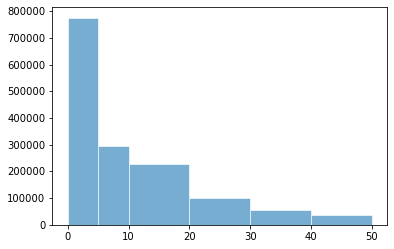

In [270]:
# check the distribution of review counts
plt.hist(us['review_count'],bins=[0, 5, 10, 20, 30, 40, 50],alpha=0.6,ec='white')

<BarContainer object of 15 artists>

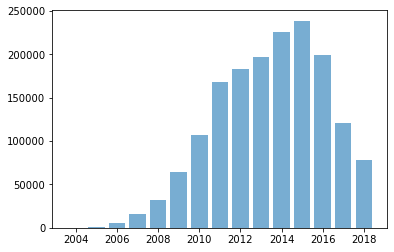

In [277]:
# check the distribution of yelp_since years
x = us.groupby(us["yelping_since"].dt.year).count()['user_id']
plt.bar(x.index, x, alpha=0.6)

In [283]:
# how many have never been elite?
(us['elite']=='').sum()
# us['elite'][us['elite'].isnull()==False].count()

1565761

In [343]:
us.to_csv('./yelp_dataset/user_filtered.csv')

# Reviews

In [284]:
## DON"T RUN AGAIN UNLESS NECESSARY (memory)
# with open('yelp_dataset/review.json') as f:
#     data = [json.loads(line) for line in f]
# rv = pd.DataFrame(data)

# rv = pd.read_csv('sample_dataset/review_sample.csv')
# rv.rename(columns={'Unnamed: 0':'ix'},inplace=True)
# rv.set_index('ix',inplace=True)

#### merge the review dataset to business dataset to filter reviews fo necessary businesses

In [338]:
#review_restaurant = review[review['business_id'].apply(lambda x:x in list(restaurant['business_id']))]
res_k = rt[['business_id']]
rv = res_k.merge(rv, how='left',on='business_id')

In [339]:
rv.describe()

,stars,useful,funny,cool
count,1.386324e+06,1.386324e+06,1.386324e+06,1.386324e+06
mean,3.758013e+00,1.211645e+00,5.733984e-01,7.185146e-01
std,1.389625e+00,3.431948e+00,2.328916e+00,2.812563e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,5.000000e+00,3.330000e+02,2.010000e+02,2.900000e+02


In [340]:
rv.head()

,business_id,review_id,user_id,stars,useful,funny,cool,text,date
0,PZ-LZzSlhSe9utkQYU8pFg,klcF45wKIOpJW_BhJslOJg,-Yz2wIcsdJxUOFMbTgoKQA,5.0,1.0,0.0,0.0,"We went there for dinner the other night, bein...",2011-06-29 02:55:07
1,PZ-LZzSlhSe9utkQYU8pFg,Li-pQG6A7p5gbgZHTMeDSQ,jYcf_e5p0UG0S-9gJq_tNA,4.0,1.0,0.0,0.0,i had the best Chicken Marcela ever. The spagh...,2010-10-06 18:20:13
2,PZ-LZzSlhSe9utkQYU8pFg,iRLX3dJ3ONvncIxPnXy1cw,nQC0JiPIk_jCooRDxpuw5A,5.0,1.0,0.0,0.0,Basically the best Italian in town for the pri...,2010-01-13 00:35:45
3,PZ-LZzSlhSe9utkQYU8pFg,rklteWf9xnTU3fAtMFBRRw,Gv_-mtOKhWFtCjn9xFe0SQ,3.0,1.0,0.0,0.0,Mmmmm delicious food and a little history. Mr....,2008-08-23 20:30:33
4,PZ-LZzSlhSe9utkQYU8pFg,UfRqM0RGdZa86hFcFEAnjw,pabMYegF28KjHQ5hybAJ0A,3.0,1.0,0.0,0.0,"This is old Vegas, this atmosphere is old scho...",2009-06-01 20:02:55


In [294]:
pd.DataFrame({'count':rv.count(),'unique':rv.nunique(),'null count':rv.isnull().sum()})

,count,unique,null count
business_id,4684209,77289,0
review_id,4684208,4684208,1
user_id,4684208,1207830,1
stars,4684208,5,1
useful,4684208,259,1
funny,4684208,215,1
cool,4684208,185,1
text,4684208,4673480,1
date,4684208,4619738,1


In [233]:
# what is the average star rating for a restaurant on yelp
rv.agg({'stars':'mean'})

stars    3.7157
dtype: float64

In [235]:
# aggregate the number of votes people casted on a review for each user
# use this value to make a new column in user column
rv.groupby('user_id').agg({'useful':'sum','funny':'sum','cool':'sum'}).sum(axis=1)

user_id
---1lKK3aKOuomHnwAkAow     21
--0kuuLmuYBe3Rmu0Iycww      5
--2HUmLkcNHZp0xw6AMBPg      0
--2PnhMMH7EYoY3wywOvgQ      4
--2vR0DIsmQ6WfcSzKWigw    657
                         ... 
zzsmdXHUFBYuKUtPbXWjRA      1
zzsw8F_LGVU-L7hb8357Fw      0
zztIVfCNMpfvCU7yEjDDVw      0
zzzAgDDWe4PTnJuwhi3XQQ      1
zzzTrQ2bkvteEngjkXCTAA      0
Length: 226123, dtype: int64

In [241]:
# want to map the number of votes for reviews users wrote but the numbers don't match up
# it's because it's a sample of the dataset
print('# of userID for user.json: {}'.format(us['user_id'].nunique()))
print('# of userID for reviews.json: {}'.format(rv['user_id'].nunique()))

# of userID for user.json: 81857
# of userID for reviews.json: 226123


In [344]:
rv.to_csv('./yelp_dataset/reviews_filtered.csv')

# Check In

In [263]:
with open('yelp_dataset/checkin.json') as f:
    data = [json.loads(line) for line in f]
ci = pd.DataFrame(data)
ci.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


# Tips

In [264]:
with open('yelp_dataset/tip.json') as f:
    data = [json.loads(line) for line in f]
tip = pd.DataFrame(data)
tip.head()

,user_id,business_id,text,date,compliment_count
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0
1,Ocha4kZBHb4JK0lOWvE0sg,OPiPeoJiv92rENwbq76orA,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0
2,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0
3,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0
4,LUlKtaM3nXd-E4N4uOk_fQ,AkL6Ous6A1atZejfZXn1Bg,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0


# Photos

In [265]:
with open('yelp_dataset/photo.json') as f:
    data = [json.loads(line) for line in f]
ph = pd.DataFrame(data)
ph.head()

,caption,photo_id,business_id,label
0,,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,inside
1,,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,inside
2,,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,food
3,,NcSlcDTEEeOaixotOPk-rA,bF8gv7k_rwZtiDLP2ZB04w,inside
4,,5IiIo5UKEW0lWqZ6sWrY_A,50Anorn0DJXFhBr9a9_gHQ,inside


In [266]:
ph['label'].value_counts()

food       114874
inside      52448
drink       18121
outside     11534
menu         3023
Name: label, dtype: int64